In [1]:
from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from matplotlib import pyplot as plt
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

sc = SparkContext.getOrCreate()

if (sc is None):
    sc = SparkContext(master="local[*]", appName="KMeans Clustering")
spark = SparkSession(sparkContext=sc)

data_frame = spark.read.csv('iris.csv', header=True, inferSchema=True)                        


In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols=cols, outputCol='features')
assembled_data = assembler.transform(data_frame)

drop_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
assembled_data = assembled_data.select([column for column in assembled_data.columns if column not in drop_list])


In [3]:
from pyspark.ml.feature import VectorIndexer

featureIndexer = VectorIndexer(inputCol="features", \
                    outputCol = "indexedFeatures",\
                    maxCategories=4).fit(assembled_data)

data = featureIndexer.transform(assembled_data)

152.36870647734008
78.94506582597637
57.34540931571787
46.78210000000013
42.02656666666704
37.076060073259924
39.203163888889904
29.04192757807506
26.802080998389656
26.249766929126324
24.46204570427321
24.289992287125344
21.420680555555776
20.039809523810206
20.20471950271874
17.68330952381048
17.652515079365287
16.108970238096248


<function matplotlib.pyplot.show>

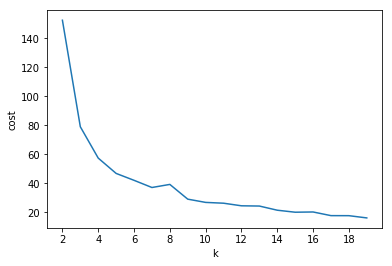

In [4]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from pyspark.ml.clustering import KMeans

cost = np.zeros(20)

for k in range (2,20):
    kmeans = KMeans()\
    .setK(k)\
    .setSeed(1)\
    .setFeaturesCol("indexedFeatures")\
    .setPredictionCol("cluster")
    model = kmeans.fit(data)
    cost[k] = model.computeCost(data) #sum of squared distances of data points to their nearest centre
    print(cost[k])

fig, ax = plt.subplots()
ax.plot(range(2,20), cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

In [5]:
#using set number of k for clustering

kmeans = KMeans()\
        .setK(3)\
        .setFeaturesCol("indexedFeatures")\
        .setPredictionCol("cluster")
    
pipeline = Pipeline(stages=[featureIndexer, kmeans])
model = pipeline.fit(assembled_data)
cluster = model.transform(assembled_data)
cluster.groupBy('cluster').count().show()

+-------+-----+
|cluster|count|
+-------+-----+
|      1|   50|
|      2|   38|
|      0|   62|
+-------+-----+

